In [52]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Load and process data

In [39]:
# load and process data
raw_df = pd.read_csv(
    Path("data.csv"),
    index_col="Date"
)
raw_df.head()

,Close
Date,
2021-07-19,274.766388
2021-07-20,277.057678
2021-07-21,279.120789
2021-07-22,283.822449
2021-07-23,287.323822


In [40]:
raw_df['pct_change'] = raw_df.pct_change()
df = raw_df.dropna()

In [41]:
df.head()

,Close,pct_change
Date,,
2021-07-20,277.057678,0.008339
2021-07-21,279.120789,0.007447
2021-07-22,283.822449,0.016845
2021-07-23,287.323822,0.012336
2021-07-26,286.708832,-0.002140


In [42]:
# Separate the data into y and X
y = df["pct_change"]
# The "X" column should be all the features
X = df.drop(columns="pct_change")

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

(187, 1)

In [50]:
# Create the scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## create and compile model

In [67]:
model = Sequential()

In [68]:
number_inputs = 1
number_hidden_nodes = 3

model.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [69]:
number_classes = 1

model.add(Dense(units=number_classes, activation="sigmoid"))

In [70]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## fit and evaluate

In [76]:
model_fit = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1174 - accuracy: 0.0053
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1154 - accuracy: 0.0053
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1135 - accuracy: 0.0053
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1117 - accuracy: 0.0053
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1098 - accuracy: 0.0053
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1080 - accuracy: 0.0053
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.1063 - accuracy: 0.0053
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1046 - accuracy: 0.0053
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1029 - accuracy: 0.0053
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1012 - accuracy: 0.0053
Epoch 11/100
6/6 [===========

<AxesSubplot:>

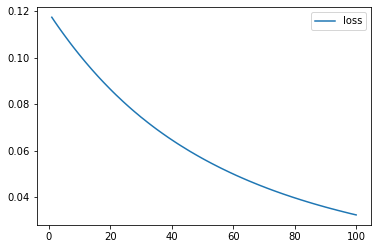

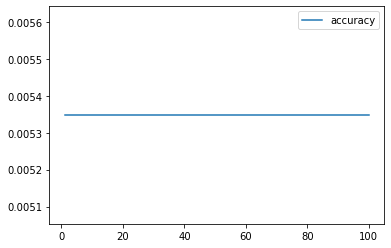

In [78]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model_fit.history, index=range(1, len(model_fit.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

# Plot the accuracy
df.plot(y="accuracy")

In [79]:
# Evaluate the model using testing data
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)

# Display evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: 0.0118 - accuracy: 0.0000e+00 - 23ms/epoch - 12ms/step
Loss: 0.011795789934694767, Accuracy: 0.0


TypeError: 'History' object is not subscriptable